### Importing Libaries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#defining path
path = r'C:\Users\gullo\OneDrive\Desktop\Career_Foundry\Data Immersion'

In [5]:
#3 import file
df = pd.read_csv(os.path.join(path, 'A6- Advanced Analytics & Dashboard Design', 'Data', 'zomato_clean.csv'), encoding='latin-1')

In [6]:
df.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [7]:
df.shape

(46743, 11)

In [8]:
df.columns

Index(['Unnamed: 0', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

### Null Hypothesis (H0):
#### There is no significant linear relationship between the "rate" and "Cost2plates" of restaurants in the data set.

### Alternative Hypothesis (H1):
#### There is a significant linear relationship between the "rate" and "Cost2plates" of restaurants in the data set.

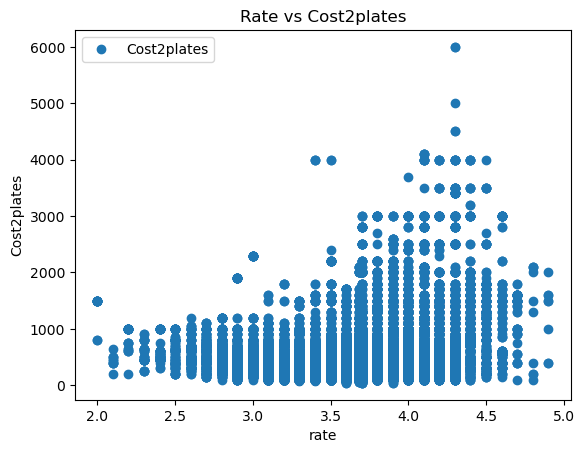

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'rate', y='Cost2plates',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rate vs Cost2plates')  
plt.xlabel('rate')  
plt.ylabel('Cost2plates')  
plt.show()

In [12]:
X = df['rate'].values.reshape(-1,1)
y = df['Cost2plates'].values.reshape(-1,1)

In [13]:
X

array([[4.1       ],
       [4.1       ],
       [3.8       ],
       ...,
       [3.68613705],
       [4.3       ],
       [3.4       ]])

In [14]:
y

array([[ 800.],
       [ 800.],
       [ 800.],
       ...,
       [2000.],
       [2500.],
       [1500.]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

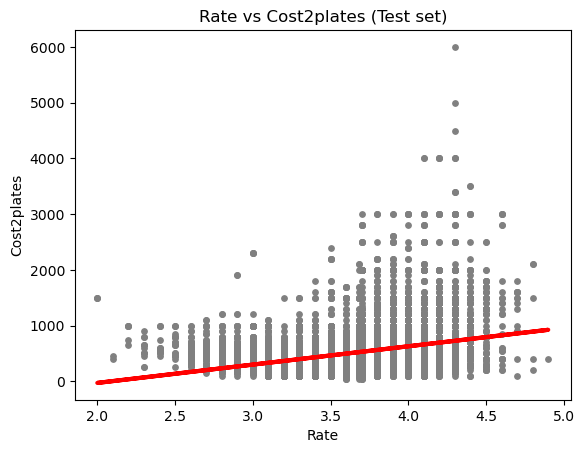

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rate vs Cost2plates (Test set)')
plot_test.xlabel('Rate')
plot_test.ylabel('Cost2plates')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.60577642]]
Mean squared error:  153477.4610903738
R2 score:  0.09339905158153106


### Obsevations 
#### 1. Slope: The coefficient of the independent variable (X) in the linear regression equation is approximately 328.61. This means that for every one-unit increase in the independent variable (X), the dependent variable (Y) is expected to increase by approximately 328.61 units.

#### 2. Mean squared error (MSE): The average squared difference between the actual values (Y) and the predicted values (Y_pred) by the regression model is used to evaluate the model's accuracy in predicting the dependent variable and is approximately 153477.46.

#### 3. R-squared (R2) score: The R-squared value, also known as the coefficient of determination is approximately 0.0934, which means that the model explains about 9.34% of the variance in the dependent variable (Y) using the independent variable (X). The low R-squared value suggests that the model's fit is relatively weak and only captures a small proportion of the variance in the data.

#### Overall, based on the provided summary statistics, the linear regression model has a positive slope, indicating a positive relationship between the independent variable (X) and the dependent variable (Y). However, the model's performance, as indicated by the mean squared error and R-squared value, is not very strong, suggesting that it may not be the best fit for the data. It's important to interpret these statistics in the context of the specific dataset and research question to draw meaningful conclusions about the regression analysis.




In [23]:
y_predicted

array([[526.21341787],
       [695.07175213],
       [235.02366514],
       ...,
       [596.4900192 ],
       [596.4900192 ],
       [526.21341787]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,300.0,526.213418
1,1500.0,695.071752
2,500.0,235.023665
3,500.0,366.465976
4,300.0,399.326553
5,500.0,629.350597
6,1300.0,596.490019
7,350.0,526.213418
8,900.0,662.211174
9,800.0,432.187131


##### Compare how the regression fits the training set

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.60577642]]
Mean squared error:  153303.78508757867
R2 score:  0.08637361845933578


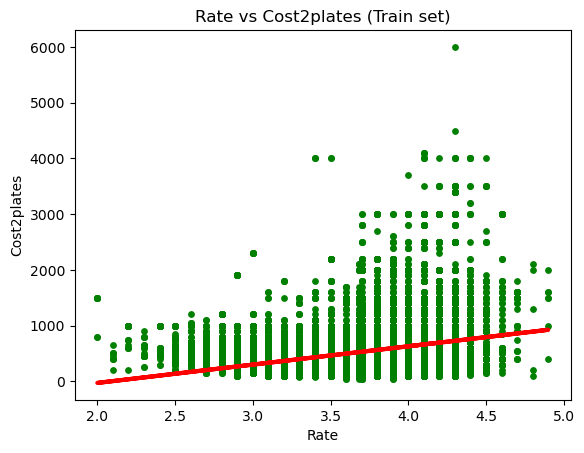

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rate vs Cost2plates (Train set)')
plot_test.xlabel('Rate')
plot_test.ylabel('Cost2plates')
plot_test.show()

### Train Regression Analysis:

####    Slope: The slope of the regression line is approximately 328.61. This means that, on average, for every one unit increase in the independent variable, the dependent variable is expected to increase by approximately 328.61 units.
####    Mean Squared Error (MSE): The mean squared error is approximately 153303.79. It represents the average squared difference between the actual values and the predicted values by the regression model. A lower MSE indicates that the model's predictions are closer to the actual data points.
####    R-squared (R2) Score: The R-squared value is approximately 0.0864. It represents the proportion of the variance in the dependent variable that can be explained by the independent variable. In this case, the model explains around 8.64% of the variance in the dependent variable using the independent variable.

#### Bonus: performance improvement after removing outliers

In [30]:
# Clean the extreme values from the "Cost2plates" variable observed during the consistency checks.

df_test = df[df['Cost2plates'] <=4000] 

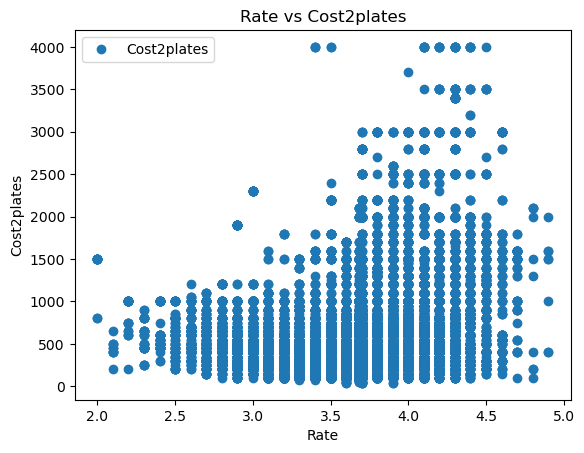

In [31]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'rate', y='Cost2plates', style='o')  
plt.title('Rate vs Cost2plates')  
plt.xlabel('Rate')  
plt.ylabel('Cost2plates')  
plt.show()

In [32]:
# Reshape again.

X_2 = df_test['rate'].values.reshape(-1,1)
y_2 = df_test['Cost2plates'].values.reshape(-1,1)

In [33]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [34]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [35]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [36]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[326.73538414]]
Mean squared error:  144691.06906749198
R2 score:  0.09505666873366925


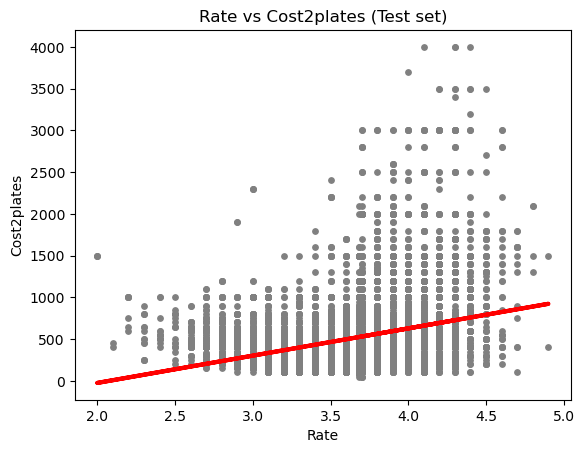

In [38]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Rate vs Cost2plates (Test set)')
plot_test.xlabel('Rate')
plot_test.ylabel('Cost2plates')
plot_test.show()

### Test Regression Analysis:

####    Slope: The slope of the regression line is approximately 326.74. This indicates that, on average, for every one unit increase in the independent variable, the dependent variable is expected to increase by approximately 326.74 units.
####    Mean Squared Error (MSE): The mean squared error is approximately 144691.07. It represents the average squared difference between the actual values and the predicted values by the regression model on the test dataset. As with the train analysis, a lower MSE suggests that the model's predictions are closer to the actual data points.
####    R-squared (R2) Score: The R-squared value is approximately 0.0951. It indicates that the model explains around 9.51% of the variance in the dependent variable using the independent variable in the test dataset.

In [39]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,850.0,726.152439
1,1000.0,525.581691
2,200.0,628.131823
3,500.0,334.069978
4,200.0,525.581691
5,700.0,334.069978
6,200.0,530.111208
7,250.0,334.069978
8,300.0,525.581691
9,400.0,530.111208


### Comparison:

####    Both the train and test regression analyses show a positive slope, indicating a positive relationship between the independent and dependent variables.
####    The MSE in the test analysis (144691.07) is slightly lower than the MSE in the train analysis (153303.79), suggesting that the model's predictions are slightly more accurate on the test dataset.
####    The R-squared values in both analyses are relatively low, indicating that the model's fit is not very strong and only explains a small proportion of the variance in the dependent variable.

#### Overall, the two analyses provide similar results, and the model's performance on the test dataset appears to be slightly better than on the train dataset. However, the R-squared values in both cases are relatively low, suggesting that the model may not be the best fit for thedata, and additional variables or more complex models may be needed to improve the predictive accuracy.